In [29]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
credit_df = pd.read_csv("credit_dataset.csv")
credit_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [9]:
pd.isnull(credit_df).any()
pd.isnull(credit_df).sum()

default    False
student    False
balance    False
income     False
dtype: bool

default    0
student    0
balance    0
income     0
dtype: int64

In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [11]:
credit_df.groupby("default").size()

default
No     9667
Yes     333
dtype: int64

In [12]:
credit_df.groupby("student").size()

student
No     7056
Yes    2944
dtype: int64

In [15]:
#Use LabelEncoder to convert categorical variables into numerical ie 0 and 1 for No and Yes respectively
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
credit_df['default'] = le.fit_transform(credit_df['default'])
credit_df['student'] = le.fit_transform(credit_df['student'])

In [16]:
credit_df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


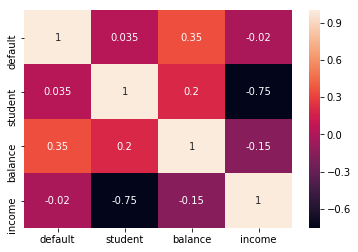

In [30]:
x = credit_df.corr()
x
sns.heatmap(x,annot=True)
plt.show();

In [21]:
X = credit_df.iloc[:,1:]
y=credit_df.iloc[:,0]
X.head()
y.head()

,student,balance,income
0,0,729.526495,44361.625074
1,1,817.180407,12106.134700
2,0,1073.549164,31767.138947
3,0,529.250605,35704.493935
4,0,785.655883,38463.495879


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [32]:
#Building linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)

lin_reg.coef_
lin_reg.intercept_

lin_reg.predict(0,1000,100000)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([-1.03301006e-02,  1.32689731e-04,  1.99152771e-07])

-0.0811794867906285

TypeError: predict() takes 2 positional arguments but 4 were given

In [48]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [49]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = log_reg.predict(X_test)

In [51]:
conf = metrics.confusion_matrix(y_test,y_pred)
conf

array([[2419,    0],
       [  81,    0]], dtype=int64)

In [52]:
np.round(metrics.mean_absolute_error(y_test,y_pred),0)
np.round(metrics.mean_squared_error(y_test,y_pred),0)
np.round(metrics.accuracy_score(y_test,y_pred),0)

0.0

0.0

1.0

In [53]:
y_test.value_counts()

0    2419
1      81
Name: default, dtype: int64

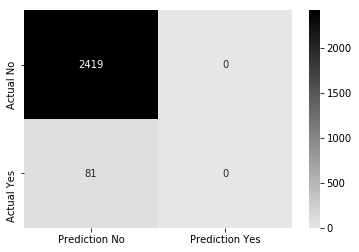

In [54]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [55]:
cr = metrics.classification_report(y_test, y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2419
          1       0.00      0.00      0.00        81

avg / total       0.94      0.97      0.95      2500



C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
preds = log_reg.predict(X_test)
print(preds.size)
print("Positive cases in Test data", y_test[y_test == 1].shape[0])
print("Negative cases in Test data", y_test[y_test == 0].shape[0])

2500
Positive cases in Test data 81
Negative cases in Test data 2419


In [64]:
metrics.accuracy_score(y_test,preds)
cls = metrics.classification_report(y_test,preds)
cls
metrics.roc_auc_score(y_test,preds)

0.9676

C:\Users\Annie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.97      1.00      0.98      2419\n          1       0.00      0.00      0.00        81\n\navg / total       0.94      0.97      0.95      2500\n'

0.5

In [66]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)